# Logistic Regression - Andres Alvarez


The binary logistic regression classifier consider random variables $\mathbf X$, $T \in\{0,1\}$  where
 \begin{align*}
 Y &= \mathsf{\sigma}(\mathbf w^t\mathbf X) = \sigma( w_0 + \sum_{k=1}^{K-1} w_kX_k),\\
 p(t\mid \mathbf w) &= \sim y^{t}(1-y)^{(1-t)},\\
 \sigma(z) &= \frac{1}{1+e^{-z}},\\ 
 z &= w_0 + \sum_{k=1}^{K-1} w_kX_k,
 \end{align*}
$ \mathbf w^t = [w_0, w_1,\dots,w_{K-1}]$, $\mathbf X = [1, X_1,\dots,X_{K-1}]^t$, and he conditional class probabilities are  $P(C_1\mid X, \mathbf w) = Y$, and $P(C_2\mid X,\mathbf w) = 1 - P(C_1\mid X, \mathbf w) $. 
 
The classsification rule for input $\mathbf X= \mathbf x$ is defined as follows:

\begin{align*}
f(\mathbf x) = \left\{
\begin{array}{ll}
        1 & \mbox{if } \sigma(\mathbf w^t\mathbf x) > 0.5 \\
        0& \mbox{otherwise.}
 \end{array}
 \right.
\end{align*}

Given a data set $\mathcal D = \{ \{\mathbf x_1,t_2,\}, \{\mathbf x_1,t_2\}, \dots, \{\mathbf x_N,t_N\}\}$ we need to estimate the  $\mathbf w$  classifier parameters. The  likelihood of the data is given by

\begin{align*}
\mathcal L(\mathbf  w \mid \mathcal D) &= \prod_{n=1}^N p(t_n\mid \mathbf w) = \prod_{n=1}^N  \left[ y_n^{t_n} (1-y_n)^{(1-t_n)}\right].
\end{align*}

The cross entropy error function is defined as

\begin{align*}
E[ \mathbf w ] &= - \log L(\mathbf  w \mid \mathcal D) = -\sum_{n=1}^N \log  p(t_n\mid \mathbf w) = -\sum_{n=1}^N \log \left[ y_n^{t_n} (1-y_n)^{(1-t_n)}\right] = -\sum_{n=1}^N \left[ t_n \log y_n + {(1-t_n) \log (1-y_n)}\right]
\end{align*}


> ## Import the libraries and read the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("/kaggle/input/logistic-regression/data_set_logistic_regression_m.csv")

> ## Print the values

In [2]:
data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,Y
0,0,-0.321535,4.815628,12.737615,12.485036,33.306948,1.106542,5.624196,0.131773,1,9.0,31,75.0,1
1,1,0.411607,5.562759,7.648079,4.920547,35.414063,2.296669,4.483413,0.825143,1,9.0,29,76.0,1
2,2,0.700029,5.819643,10.586706,8.762863,32.404584,0.811097,5.944864,0.681252,1,10.0,24,88.0,1
3,3,0.226974,5.285195,10.258356,10.778447,45.987042,0.110584,5.708611,0.857634,1,9.0,29,78.0,1
4,4,0.147070,5.918314,13.985822,0.827570,21.949347,0.050553,7.426944,0.645198,1,10.0,31,85.0,1


> ## Exploratory data analysis

In [3]:
data.shape # number of variables and records

(998, 14)

In [4]:
data.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'Y'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  998 non-null    int64  
 1   X1          997 non-null    float64
 2   X2          997 non-null    float64
 3   X3          996 non-null    float64
 4   X4          997 non-null    float64
 5   X5          997 non-null    float64
 6   X6          996 non-null    float64
 7   X7          998 non-null    float64
 8   X8          998 non-null    float64
 9   X9          998 non-null    int64  
 10  X10         997 non-null    float64
 11  X11         998 non-null    int64  
 12  X12         996 non-null    float64
 13  Y           998 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 109.3 KB


In [6]:
nullvalue_columns=data.isnull().any()
nullvalue_columns

Unnamed: 0    False
X1             True
X2             True
X3             True
X4             True
X5             True
X6             True
X7            False
X8            False
X9            False
X10            True
X11           False
X12            True
Y             False
dtype: bool

In [7]:
categorical_features = list(data.select_dtypes(include='object').columns)

In [8]:
print('There are {} categorical variables\n'.format(len(categorical_features)))

print('The categorical variables are :', categorical_features)


There are 0 categorical variables

The categorical variables are : []


In [9]:
numerical_features = list(data.select_dtypes(exclude='object').columns)

In [10]:
print('There are {} numerical variables\n'.format(len(numerical_features)))

print('The numerical variables are :', numerical_features)

print(round(data[numerical_features].describe()),2)

There are 14 numerical variables

The numerical variables are : ['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'Y']
       Unnamed: 0     X1      X2     X3     X4     X5     X6     X7     X8  \
count       998.0  997.0   997.0  996.0  997.0  997.0  996.0  998.0  998.0   
mean        498.0   -1.0     1.0    7.0    6.0    8.0    5.0    8.0    1.0   
std         288.0    4.0    32.0    4.0    5.0   36.0    6.0    5.0    0.0   
min           0.0 -100.0   -12.0   -7.0   -5.0  -78.0    0.0    2.0    0.0   
25%         249.0   -1.0    -5.0    5.0    3.0  -25.0    1.0    4.0    0.0   
50%         498.0   -1.0     3.0    8.0    6.0   14.0    3.0    6.0    1.0   
75%         748.0    0.0     5.0   10.0    9.0   40.0    8.0   11.0    1.0   
max         997.0    4.0  1000.0   15.0   90.0   78.0   60.0   32.0    1.0   

          X9    X10    X11    X12      Y  
count  998.0  997.0  998.0  996.0  998.0  
mean     0.0    5.0   26.0   73.0    0.0  
std      

In [11]:
data[categorical_features].isnull().any()

Series([], dtype: bool)

In [12]:
#The column 'Unnamed: 0' is useless so we can drop it
data.drop(['Unnamed: 0'],axis=1,inplace=True)


In [13]:
numerical_features = list(data.select_dtypes(exclude='object').columns)

In [14]:
#The easiest way to proceed is to eliminate the columns with missing values
#since is not a great number of samples 
data.dropna(inplace=True)
data.isnull().any()

X1     False
X2     False
X3     False
X4     False
X5     False
X6     False
X7     False
X8     False
X9     False
X10    False
X11    False
X12    False
Y      False
dtype: bool

In [15]:
data.shape

(987, 13)

In [16]:
#we keep 987 samples out of 998

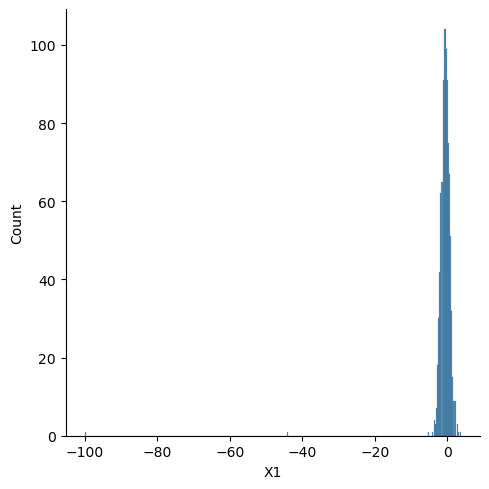

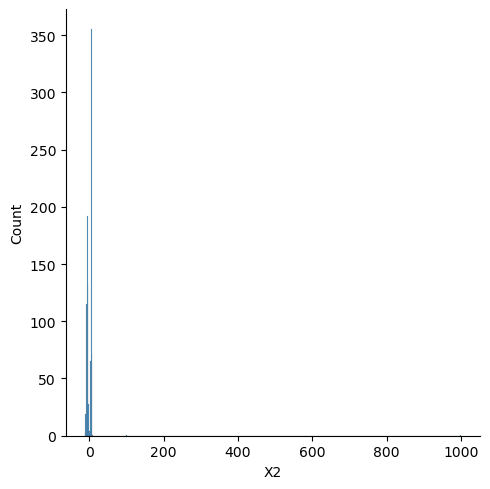

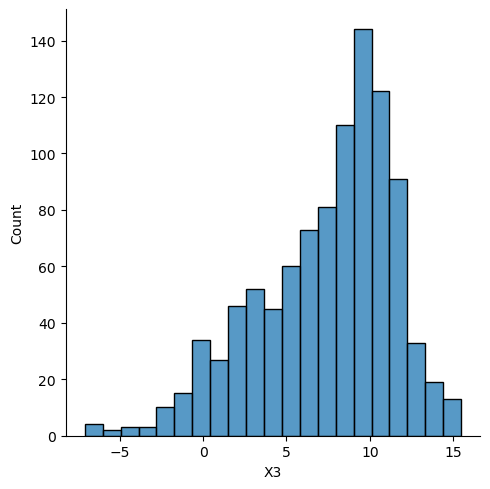

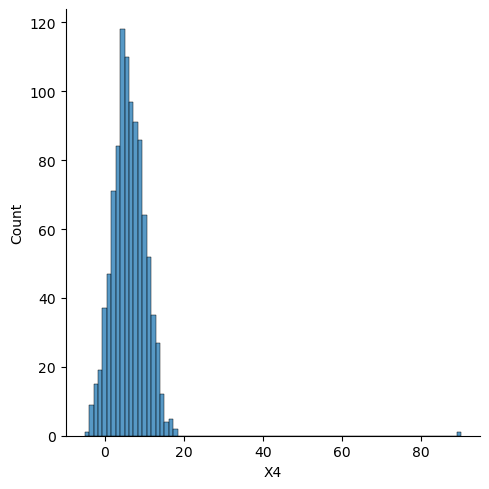

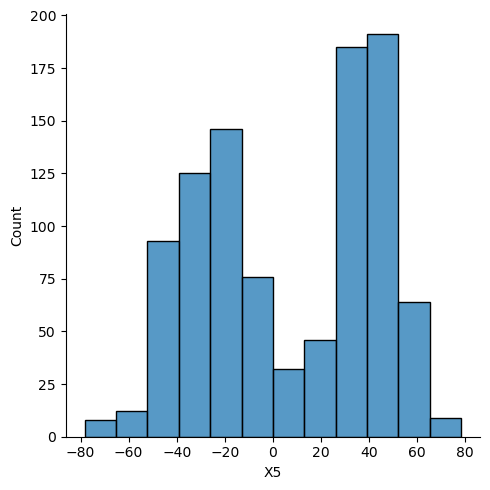

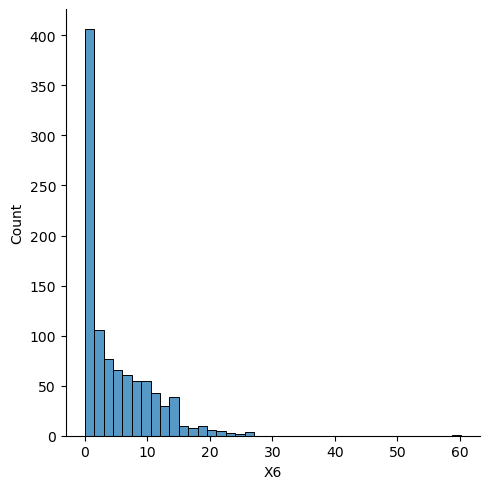

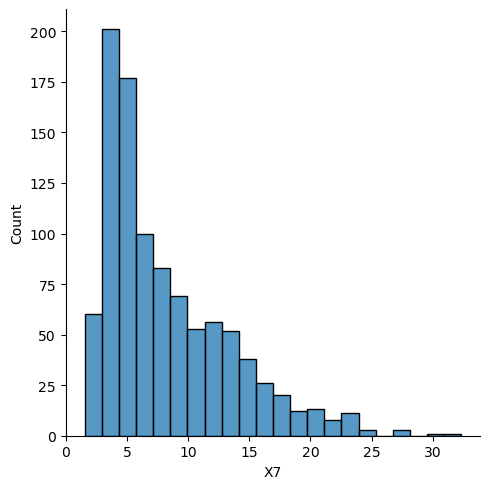

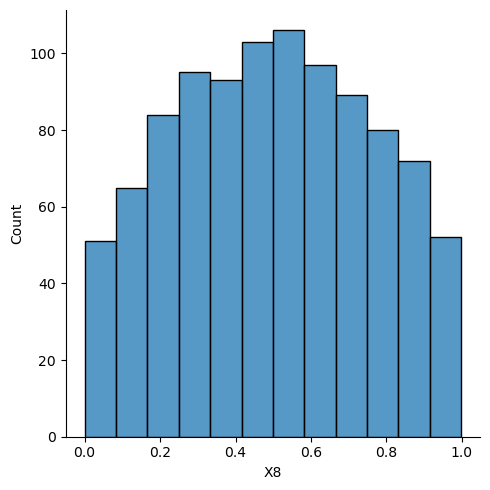

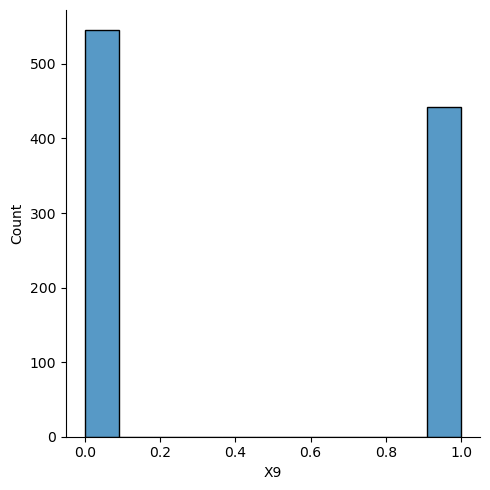

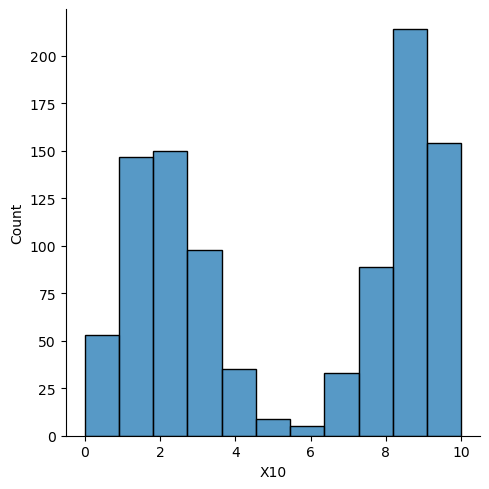

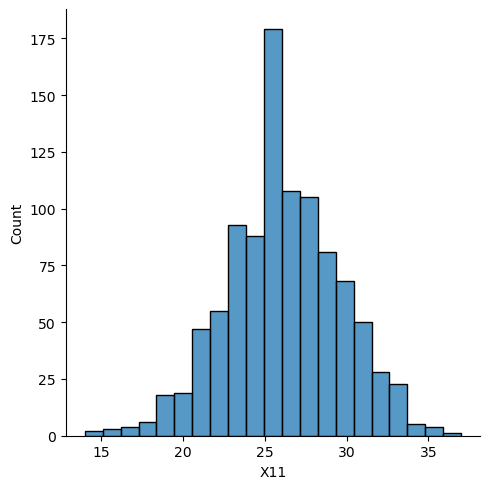

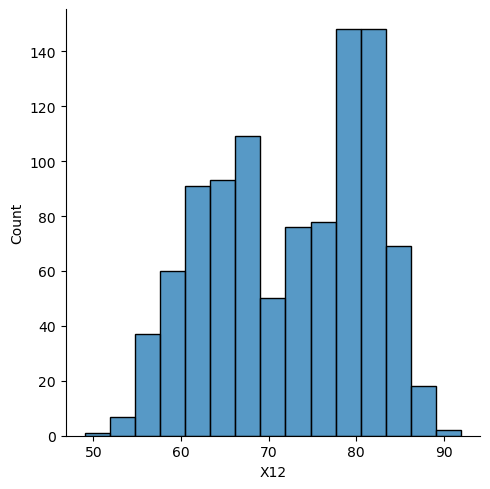

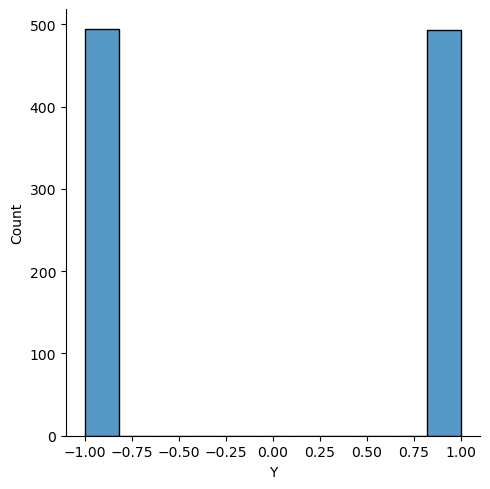

In [17]:
for i in numerical_features:
    sns.displot(data[i])
    plt.show()

In [18]:
numerical_features

['X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'X10',
 'X11',
 'X12',
 'Y']

#### Null values have been handled

### We check for outliers  

In [19]:
import numpy as np
def iqr(data,col):
    q1,q3 = np.percentile(data[col],[25,75])
    iqr = q3-q1 
    lower = q1-1.5*iqr
    upper = q3+1.5*iqr
    data = data[(data[col]>lower) & (data[col]<upper)]
    data.boxplot(col)

In [20]:
numerical_features

['X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'X10',
 'X11',
 'X12',
 'Y']

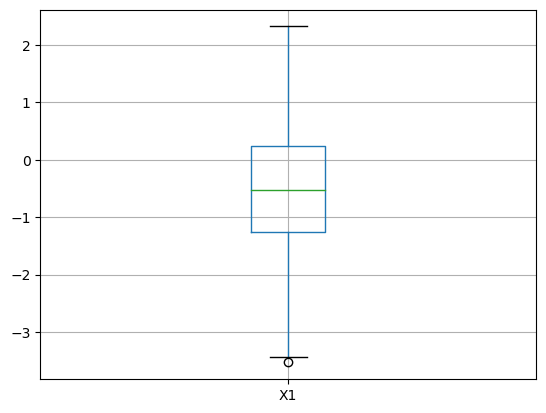

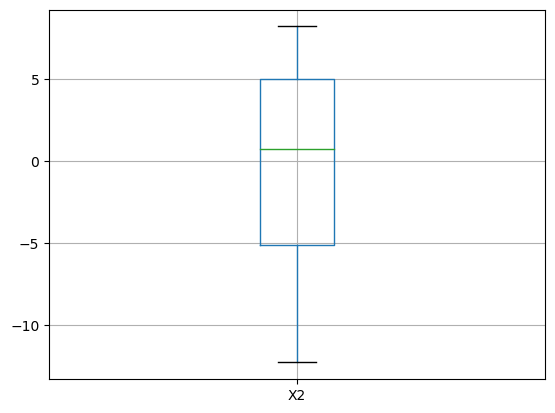

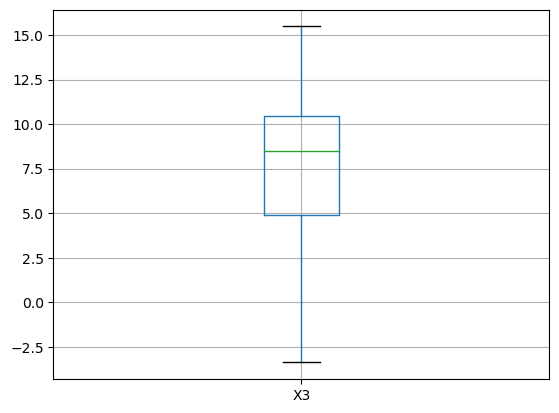

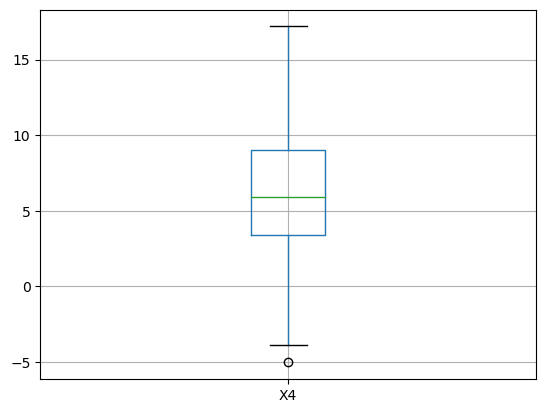

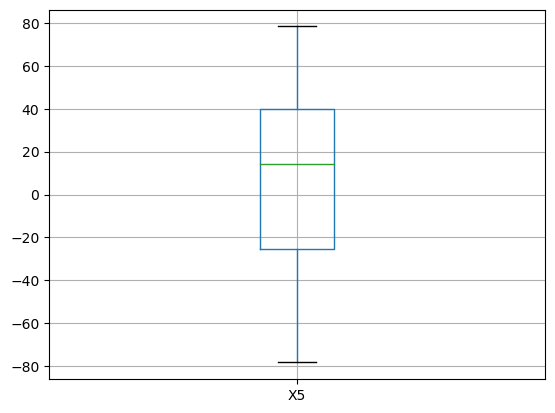

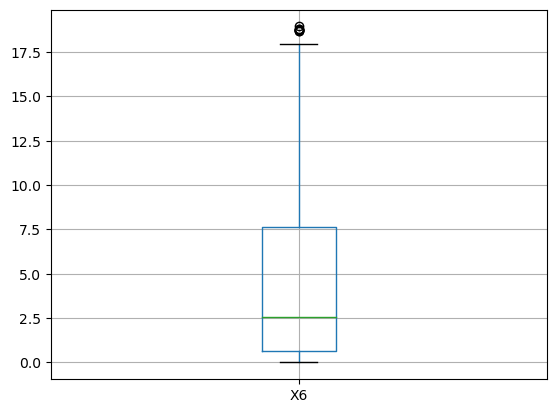

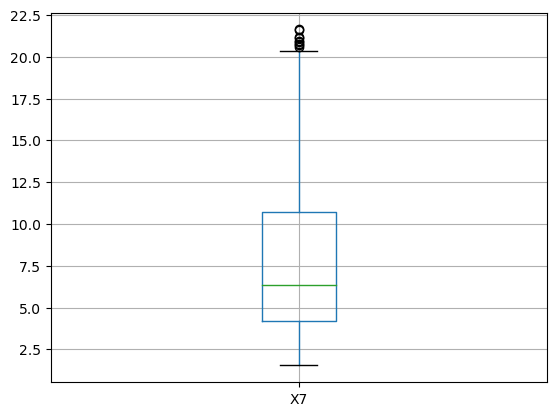

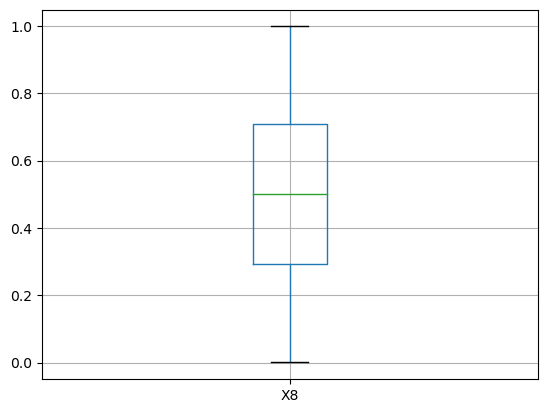

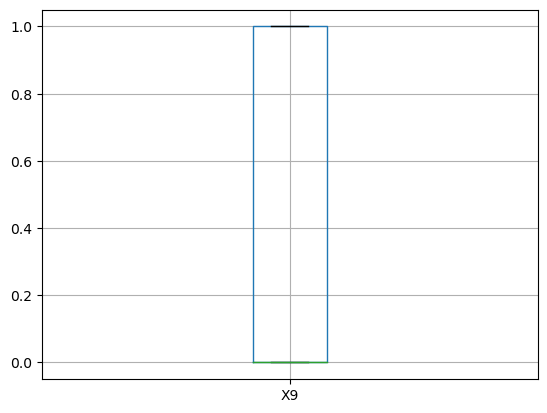

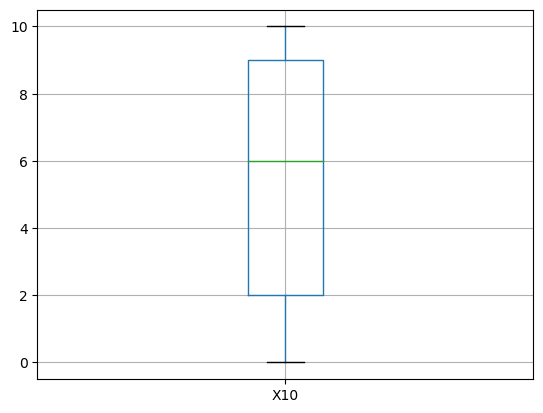

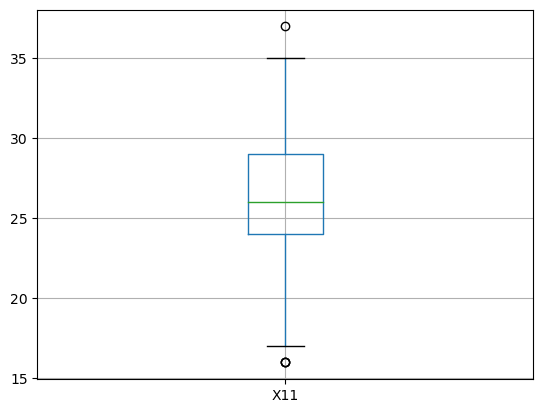

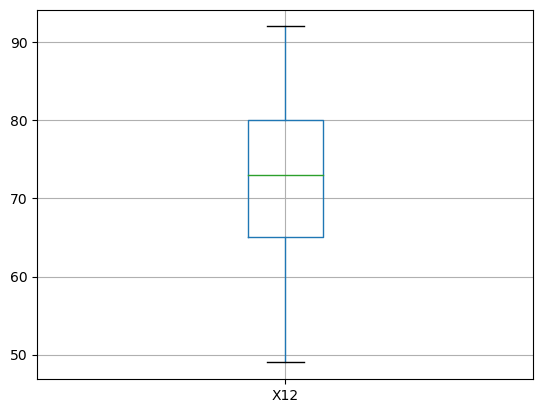

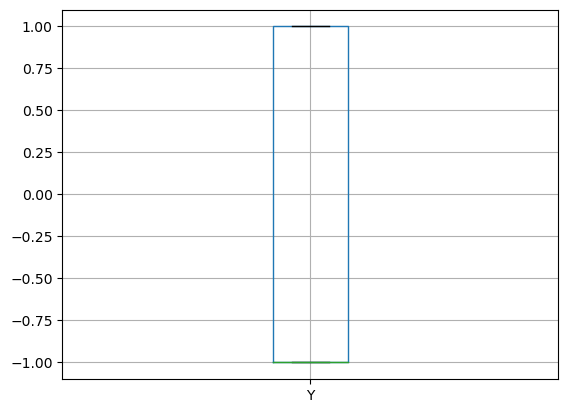

In [21]:
for i in numerical_features:
    iqr(data,i)
    plt.show()

In [22]:
#we can see outliers in X1, X4, X6, X7 and X11

In [23]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,Y
0,-0.321535,4.815628,12.737615,12.485036,33.306948,1.106542,5.624196,0.131773,1,9.0,31,75.0,1
1,0.411607,5.562759,7.648079,4.920547,35.414063,2.296669,4.483413,0.825143,1,9.0,29,76.0,1
2,0.700029,5.819643,10.586706,8.762863,32.404584,0.811097,5.944864,0.681252,1,10.0,24,88.0,1
3,0.226974,5.285195,10.258356,10.778447,45.987042,0.110584,5.708611,0.857634,1,9.0,29,78.0,1
4,0.147070,5.918314,13.985822,0.827570,21.949347,0.050553,7.426944,0.645198,1,10.0,31,85.0,1


### Label encoding

In [24]:
# we don't need label encoding since we don't have categorical features

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 987 entries, 0 to 997
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      987 non-null    float64
 1   X2      987 non-null    float64
 2   X3      987 non-null    float64
 3   X4      987 non-null    float64
 4   X5      987 non-null    float64
 5   X6      987 non-null    float64
 6   X7      987 non-null    float64
 7   X8      987 non-null    float64
 8   X9      987 non-null    int64  
 9   X10     987 non-null    float64
 10  X11     987 non-null    int64  
 11  X12     987 non-null    float64
 12  Y       987 non-null    int64  
dtypes: float64(10), int64(3)
memory usage: 108.0 KB


### All the features are  numerical

> ### Store the value of features and target output in seperate DataFrames

In [26]:
x = data.drop(['Y'],axis=1).values
y = data['Y'].values


> ### Split into training and testing set

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=100) 

In [28]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(690, 12)
(690,)
(297, 12)
(297,)


> ## Feature Scaling

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

> ### Apply logistic regression and fit the model

In [30]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

> ### Predict the values

In [31]:
y_pred = log_reg.predict(x_test)

In [32]:
y_pred

array([-1, -1,  1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1, -1,
        1,  1,  1, -1, -1,  1,  1, -1,  1, -1,  1, -1, -1,  1,  1,  1, -1,
       -1,  1, -1, -1, -1, -1, -1,  1, -1,  1,  1, -1, -1,  1,  1,  1, -1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,
        1, -1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1, -1,
        1, -1,  1,  1,  1,  1, -1, -1, -1,  1, -1, -1, -1,  1,  1,  1, -1,
        1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1, -1,  1, -1,  1, -1, -1,
       -1,  1, -1, -1,  1,  1, -1, -1, -1,  1, -1,  1,  1,  1, -1, -1, -1,
        1,  1,  1, -1, -1, -1, -1, -1,  1,  1, -1, -1,  1, -1, -1, -1,  1,
       -1,  1,  1, -1,  1, -1, -1, -1,  1, -1,  1, -1,  1, -1, -1, -1,  1,
       -1,  1, -1,  1,  1,  1, -1, -1, -1, -1,  1, -1,  1,  1, -1, -1, -1,
        1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,
       -1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1,
       -1,  1,  1,  1, -1

predict_proba method\
predict_proba method gives the probabilities for the target variable(0 and 1) in this case, in array form.\
0 is for probability of no rain and 1 is for probability of rain.

In [33]:
log_reg.predict_proba(x_test)[:,0]

array([9.99727271e-01, 9.98755610e-01, 1.99855271e-03, 9.99860044e-01,
       9.93062205e-01, 1.05056019e-03, 2.61192921e-03, 9.99977741e-01,
       3.51373968e-04, 2.74808751e-03, 1.46351143e-03, 9.99898953e-01,
       9.66552847e-01, 1.03322690e-02, 5.22268632e-04, 3.64728292e-03,
       9.99343701e-01, 9.24809571e-03, 1.61241809e-03, 1.56221207e-03,
       9.96256092e-01, 9.97504132e-01, 1.76771793e-04, 2.83280140e-03,
       9.99952130e-01, 2.30153091e-03, 9.99066850e-01, 3.65350567e-03,
       9.99328627e-01, 9.93747797e-01, 1.27388287e-02, 1.54986813e-02,
       7.43231672e-04, 9.99971906e-01, 9.99920507e-01, 9.70054899e-04,
       9.99178162e-01, 9.99172135e-01, 9.99762851e-01, 9.99915637e-01,
       9.99779322e-01, 1.52311497e-03, 9.99653846e-01, 4.88478001e-03,
       2.81525038e-03, 9.99213449e-01, 9.99831337e-01, 1.55645508e-03,
       2.46051558e-02, 2.49294216e-04, 9.99314765e-01, 1.02600625e-03,
       8.60790927e-03, 9.99128101e-01, 1.84260696e-03, 5.39255238e-04,
      

In [34]:
log_reg.predict_proba(x_test)[:,1]

array([2.72728850e-04, 1.24439014e-03, 9.98001447e-01, 1.39955858e-04,
       6.93779479e-03, 9.98949440e-01, 9.97388071e-01, 2.22593503e-05,
       9.99648626e-01, 9.97251912e-01, 9.98536489e-01, 1.01047401e-04,
       3.34471528e-02, 9.89667731e-01, 9.99477731e-01, 9.96352717e-01,
       6.56299183e-04, 9.90751904e-01, 9.98387582e-01, 9.98437788e-01,
       3.74390824e-03, 2.49586831e-03, 9.99823228e-01, 9.97167199e-01,
       4.78701437e-05, 9.97698469e-01, 9.33149816e-04, 9.96346494e-01,
       6.71373095e-04, 6.25220262e-03, 9.87261171e-01, 9.84501319e-01,
       9.99256768e-01, 2.80942257e-05, 7.94929905e-05, 9.99029945e-01,
       8.21837751e-04, 8.27865250e-04, 2.37149122e-04, 8.43633607e-05,
       2.20678425e-04, 9.98476885e-01, 3.46153912e-04, 9.95115220e-01,
       9.97184750e-01, 7.86551052e-04, 1.68663264e-04, 9.98443545e-01,
       9.75394844e-01, 9.99750706e-01, 6.85234768e-04, 9.98973994e-01,
       9.91392091e-01, 8.71898589e-04, 9.98157393e-01, 9.99460745e-01,
      

> ## Check accuracy score

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below.

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9966329966329966

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[136,   0],
       [  1, 160]])

In [37]:
print('Training set score: {:.4f}'.format(log_reg.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(log_reg.score(x_test, y_test)))

Training set score: 1.0000
Test set score: 0.9966


two values are quite comparable. So, there is no question of overfitting.

In [38]:
y_test = pd.DataFrame(y_test)

In [39]:
y_test.value_counts()

 1    161
-1    136
dtype: int64

In [40]:
y_test.describe()

,0
count,297.000000
mean,0.084175
std,0.998133
min,-1.000000
25%,-1.000000
50%,1.000000
75%,1.000000
max,1.000000


> ## Check null accuracy score


In [41]:
null_accuracy = (34039/(34039+9599))
print(null_accuracy)

0.7800311654979605


> ## Classification Report

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.99      1.00      1.00       136
           1       1.00      0.99      1.00       161

    accuracy                           1.00       297
   macro avg       1.00      1.00      1.00       297
weighted avg       1.00      1.00      1.00       297



> ## Confusion Matrix

<AxesSubplot:>

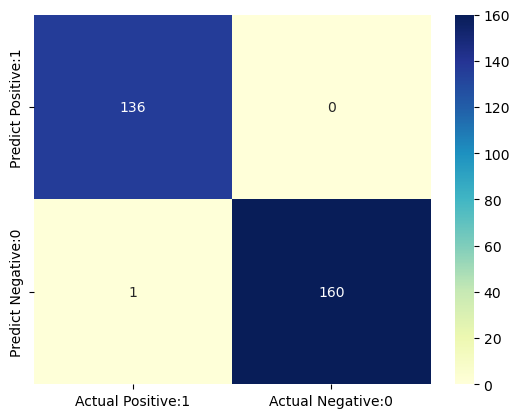

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

> ## Classification accuracy

In [44]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [45]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
classification_accuracy

0.9966329966329966

> ## Classification error

In [46]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
classification_error

0.003367003367003367

> ## Precision

In [47]:
precision = TP / float(TP + FP)
precision

1.0

> ## Recall

In [48]:
recall = TP / float(TP + FN)
recall

0.9927007299270073